**Importion**

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Core data manipulation and numerical computing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn components
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, accuracy_score
)
# Import calibration_curve from sklearn.calibration
from sklearn.calibration import calibration_curve

# XGBoost
import xgboost as xgb

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Reshape
from tensorflow.keras.callbacks import EarlyStopping

# PyTorch and TabNet
import torch
from torch.utils.data import Dataset, DataLoader
from pytorch_tabnet.tab_model import TabNetClassifier

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# **1. Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The file path to your dataset in Google Drive
file_path = '/content/drive/MyDrive/Graduation/augmented_creditcard_data.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it loaded correctly
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,index
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,541
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,623
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,4920
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,6108
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,6329


In [ ]:
df.shape

(454807, 32)

In [ ]:
# drop the index column

df = df.iloc[:, 1:]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,index
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,541
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,623
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,4920
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,6108
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,6329


# **2. Data splitting**

In [ ]:
# Assuming 'Class' is the target variable in your DataFrame
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (363845, 30)
Shape of X_test: (90962, 30)
Shape of y_train: (363845,)
Shape of y_test: (90962,)


In [ ]:
# ML Evaluatoin report function V0.2
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Predicted probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_train_proba = model.predict_proba(X_train)[:, 1]

    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Get classification report as dictionary
    report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Create a 3x3 grid for all visualizations
    plt.figure(figsize=(20, 15))
    plt.suptitle(f"{model_name} Evaluation Dashboard", fontsize=16, y=1.02)

    # Confusion Matrix
    plt.subplot(3, 3, 1)
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # ROC Curve
    plt.subplot(3, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    plt.subplot(3, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")

    # Cumulative Gains Chart
    plt.subplot(3, 3, 4)
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives Captured")
    plt.title("Cumulative Gains Chart")
    plt.legend()

    # Predicted Probability Distribution
    plt.subplot(3, 3, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title("Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # Overfitting Check
    plt.subplot(3, 3, 6)
    plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title("Accuracy Comparison")
    plt.ylim(0, 1)

    # Classification Report Table with highlighted class 1
    plt.subplot(3, 3, (7, 9))
    # Prepare data for the table
    metrics = ['precision', 'recall', 'f1-score', 'support']
    classes = list(report_dict.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    cell_text = []

    for cls in classes:
        row = [report_dict[cls][metric] for metric in metrics[:-1]]  # Exclude support
        cell_text.append([f"{x:.2f}" for x in row])

    # Add support separately (as integer)
    support = [int(report_dict[cls]['support']) for cls in classes]
    for i, val in enumerate(support):
        cell_text[i].append(str(val))

    # Add averages
    avg_names = ['macro avg', 'weighted avg']
    for name in avg_names:
        row = [report_dict[name][metric] for metric in metrics[:-1]]
        cell_text.append([f"{x:.2f}" for x in row] + [str(int(report_dict[name]['support']))])

    # Create table
    table = plt.table(cellText=cell_text,
                     rowLabels=classes + avg_names,
                     colLabels=metrics,
                     loc='center',
                     cellLoc='center')

    # Style the table - larger font and highlight class 1
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Increased from 10 to 12

    # Highlight class 1 row (assuming it's labeled '1' or 'positive')
    class_1_label = '1' if '1' in classes else ('positive' if 'positive' in classes else None)

    if class_1_label:
        class_1_idx = classes.index(class_1_label)
        for j in range(len(metrics)):
            table[(class_1_idx+1, j)].set_facecolor('#FFFACD')  # Light yellow background
            table[(class_1_idx+1, j)].set_fontsize(14)  # Even larger font for class 1

    # Highlight header
    for j in range(len(metrics)):
        table[(0, j)].set_facecolor('#E6E6FA')  # Light purple for header
        table[(0, j)].set_fontsize(12)

    table.scale(1, 1.5)
    plt.axis('off')
    plt.title("Classification Report (Class 1 Highlighted)", fontsize=14)

    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy:  {test_acc:.4f}")

    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

# **3. Modeling**

## 6.0 Evaluation Function

#### **6.0.1 Machine Learning Evaluatoin function**

In [ ]:
# ML Evaluatoin report function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Predicted probabilities
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_train_proba = model.predict_proba(X_train)[:, 1]

    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Get classification report as dictionary
    report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Create a 3x3 grid for all visualizations
    plt.figure(figsize=(20, 15))
    plt.suptitle(f"{model_name} Evaluation Dashboard", fontsize=16, y=1.02)

    # Confusion Matrix
    plt.subplot(3, 3, 1)
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # ROC Curve
    plt.subplot(3, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # Precision-Recall Curve
    plt.subplot(3, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")

    # Cumulative Gains Chart
    plt.subplot(3, 3, 4)
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives Captured")
    plt.title("Cumulative Gains Chart")
    plt.legend()

    # Predicted Probability Distribution
    plt.subplot(3, 3, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title("Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # Overfitting Check
    plt.subplot(3, 3, 6)
    plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title("Accuracy Comparison")
    plt.ylim(0, 1)

    # Classification Report Table with highlighted class 1
    plt.subplot(3, 3, (7, 9))
    # Prepare data for the table
    metrics = ['precision', 'recall', 'f1-score', 'support']
    classes = list(report_dict.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    cell_text = []

    for cls in classes:
        row = [report_dict[cls][metric] for metric in metrics[:-1]]  # Exclude support
        cell_text.append([f"{x:.2f}" for x in row])

    # Add support separately (as integer)
    support = [int(report_dict[cls]['support']) for cls in classes]
    for i, val in enumerate(support):
        cell_text[i].append(str(val))

    # Add averages
    avg_names = ['macro avg', 'weighted avg']
    for name in avg_names:
        row = [report_dict[name][metric] for metric in metrics[:-1]]
        cell_text.append([f"{x:.2f}" for x in row] + [str(int(report_dict[name]['support']))])

    # Create table
    table = plt.table(cellText=cell_text,
                     rowLabels=classes + avg_names,
                     colLabels=metrics,
                     loc='center',
                     cellLoc='center')

    # Style the table - larger font and highlight class 1
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Increased from 10 to 12

    # Highlight class 1 row (assuming it's labeled '1' or 'positive')
    class_1_label = '1' if '1' in classes else ('positive' if 'positive' in classes else None)

    if class_1_label:
        class_1_idx = classes.index(class_1_label)
        for j in range(len(metrics)):
            table[(class_1_idx+1, j)].set_facecolor('#FFFACD')  # Light yellow background
            table[(class_1_idx+1, j)].set_fontsize(14)  # Even larger font for class 1

    # Highlight header
    for j in range(len(metrics)):
        table[(0, j)].set_facecolor('#E6E6FA')  # Light purple for header
        table[(0, j)].set_fontsize(12)

    table.scale(1, 1.5)
    plt.axis('off')
    plt.title("Classification Report (Class 1 Highlighted)", fontsize=14)

    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy:  {test_acc:.4f}")

    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

#### **6.0.2 Neural Network Evaluatoin function**

In [ ]:
def evaluate_nn_model(model, X_train, y_train, X_test, y_test, model_name="Neural Network", history=None):
    # Predictions and probabilities
    y_test_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    y_train_pred = (model.predict(X_train) > 0.5).astype("int32").flatten()
    y_test_proba = model.predict(X_test).flatten()
    y_train_proba = model.predict(X_train).flatten()

    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

    # Sort for cumulative gains
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)

    # Create the master figure
    plt.figure(figsize=(20, 16))

    # 1. Confusion Matrix
    plt.subplot(3, 3, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    plt.subplot(3, 3, 2)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    plt.subplot(3, 3, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")

    # 4. Cumulative Gains Chart
    plt.subplot(3, 3, 4)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives")
    plt.title("Cumulative Gains Chart")
    plt.legend()

    # 5. Predicted Probability Distribution
    plt.subplot(3, 3, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title("Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # 6. Accuracy/Loss History (if available)
    if history is not None:
        # Accuracy history
        plt.subplot(3, 3, 6)
        plt.plot(history.history['accuracy'], label='Train')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title('Training Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()

        # Loss history
        plt.subplot(3, 3, 7)
        plt.plot(history.history['loss'], label='Train')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation')
        plt.title('Training Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()

    # 7. Overfitting Check
    plt.subplot(3, 3, 8)
    plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title("Accuracy Comparison")
    plt.ylim(0, 1)

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Evaluation Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # Print numerical results
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")

    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

#### **6.0.3 Autoencoder Evaluatoin function**

In [ ]:
def evaluate_autoencoder(y_true, reconstruction_errors, threshold=None, model_name="Autoencoder",
                       train_reconstruction_errors=None, history=None):
    if threshold is None:
        threshold = np.percentile(reconstruction_errors[y_true == 0], 95)
        print(f"Using threshold at 95th percentile of normal data: {threshold:.4f}")

    # Predicted labels from threshold
    y_pred = (reconstruction_errors > threshold).astype(int)

    # Calculate metrics
    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, reconstruction_errors)
    auc = roc_auc_score(y_true, reconstruction_errors)
    precision, recall, _ = precision_recall_curve(y_true, reconstruction_errors)

    # Initialize variables for training metrics
    train_acc = None
    test_acc = accuracy_score(y_true, y_pred)

    # Calculate training accuracy if training errors are provided
    if train_reconstruction_errors is not None:
        train_pred = (train_reconstruction_errors > threshold).astype(int)
        train_labels = np.zeros_like(train_pred)  # All training data is normal
        train_acc = accuracy_score(train_labels, train_pred)
        print(f"\nTraining Accuracy (on normal data): {train_acc:.4f}")

    # Create the master figure
    plt.figure(figsize=(24, 16))

    # 1. Confusion Matrix
    plt.subplot(3, 4, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    plt.subplot(3, 4, 2)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    plt.subplot(3, 4, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")

    # 4. Error Distribution
    plt.subplot(3, 4, 4)
    sns.histplot(reconstruction_errors, bins=50, kde=True)
    plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
    plt.title("Reconstruction Error Distribution")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Frequency")
    plt.legend()

    # 5. Training Loss History (if available)
    if history is not None:
        # Loss history
        plt.subplot(3, 4, 5)
        plt.plot(history.history['loss'], label='Train')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation')
        plt.title('Training Loss')
        plt.ylabel('MSE Loss')
        plt.xlabel('Epoch')
        plt.legend()

        # Accuracy history (if available in history)
        if 'accuracy' in history.history:
            plt.subplot(3, 4, 6)
            plt.plot(history.history['accuracy'], label='Train')
            if 'val_accuracy' in history.history:
                plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title('Training Accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend()
            plt.ylim(0, 1)
        else:
            # Create normalized accuracy from loss if direct accuracy not available
            plt.subplot(3, 4, 6)
            min_loss = min(history.history['loss'])
            max_loss = max(history.history['loss'])
            norm_accuracy = 1 - (np.array(history.history['loss']) - min_loss)/(max_loss - min_loss)
            plt.plot(norm_accuracy, label='Train (norm. from loss)', color='green')

            if 'val_loss' in history.history:
                val_min = min(history.history['val_loss'])
                val_max = max(history.history['val_loss'])
                val_norm = 1 - (np.array(history.history['val_loss']) - val_min)/(val_max - val_min)
                plt.plot(val_norm, label='Validation (norm. from loss)', color='purple')

            plt.title('Normalized Accuracy (from Loss)')
            plt.ylabel('Accuracy-like Metric')
            plt.xlabel('Epoch')
            plt.legend()
            plt.ylim(0, 1)

    # 7. Overfitting Check (if train errors available)
    if train_reconstruction_errors is not None:
        plt.subplot(3, 4, 7)
        plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
        plt.ylim(0, 1)
        plt.title("Accuracy Comparison")
        for i, v in enumerate([train_acc, test_acc]):
            plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Evaluation Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # Print numerical results
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"\n{model_name} ROC AUC Score: {auc:.4f}")

    if train_reconstruction_errors is not None:
        diff = train_acc - test_acc
        print(f"\nOverfitting Check:")
        print(f"Training Accuracy (normal data): {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        if diff > 0.03:
            print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
        elif diff < -0.03:
            print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
        else:
            print("No overfitting: Training and test accuracies are close.")

#### **6.0.4 RNN Evaluatoin function**

In [ ]:
def evaluate_rnn_model(model, X_train_scaled, y_train, X_test_scaled, y_test, history=None, model_name="RNN Model"):
    # Reshape input for RNN: (samples, timesteps, features=1)
    X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Predict class labels
    y_test_pred = (model.predict(X_test_rnn) > 0.5).astype("int32").flatten()
    y_train_pred = (model.predict(X_train_rnn) > 0.5).astype("int32").flatten()

    # Predicted probabilities
    y_test_proba = model.predict(X_test_rnn).flatten()
    y_train_proba = model.predict(X_train_rnn).flatten()

    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))

    # Create a single comprehensive figure with all evaluation plots
    # Adjust grid size based on whether history is available
    if history is not None:
        plt.figure(figsize=(24, 16))  # Larger figure to accommodate more plots
        subplot_rows, subplot_cols = 3, 4  # 3x4 grid for 8 plots
    else:
        plt.figure(figsize=(18, 12))
        subplot_rows, subplot_cols = 2, 3  # 2x3 grid for 6 plots

    # 1. Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_test_pred)
    plt.subplot(subplot_rows, subplot_cols, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 2)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")

    # 4. Cumulative Gains Chart
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    plt.subplot(subplot_rows, subplot_cols, 4)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives Captured")
    plt.title(f"{model_name} - Cumulative Gains Chart")
    plt.legend()

    # 5. Predicted Probability Distribution
    plt.subplot(subplot_rows, subplot_cols, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title(f"{model_name} - Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # 6. Overfitting Check
    plt.subplot(subplot_rows, subplot_cols, 6)
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title(f"{model_name} - Overfitting Check")
    plt.ylim(0, 1)
    # Add percentage labels on bars
    plt.text(0, train_acc + 0.02, f"{train_acc:.2%}", ha='center', fontweight='bold')
    plt.text(1, test_acc + 0.02, f"{test_acc:.2%}", ha='center', fontweight='bold')

    # 7 & 8. Training History Plots (if available)
    if history is not None:
        # 7. Accuracy History
        plt.subplot(subplot_rows, subplot_cols, 7)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 8. Loss History
        plt.subplot(subplot_rows, subplot_cols, 8)
        plt.plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} - Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Comprehensive Evaluation", fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy:  {test_acc:.4f}")

    # Overfitting analysis
    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

#### **6.0.5 LSTM Evaluatoin function**

In [ ]:
def evaluate_lstm_model(model, X_train_scaled, y_train, X_test_scaled, y_test, history=None, model_name="LSTM Model"):
    # Reshape input for LSTM: (samples, timesteps, features)
    X_train = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Predict class labels
    y_test_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    y_train_pred = (model.predict(X_train) > 0.5).astype("int32").flatten()

    # Predicted probabilities
    y_test_proba = model.predict(X_test).flatten()
    y_train_proba = model.predict(X_train).flatten()

    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))

    # Create a single comprehensive figure with all evaluation plots
    # Adjust grid size based on whether history is available
    if history is not None:
        plt.figure(figsize=(24, 16))  # Larger figure to accommodate more plots
        subplot_rows, subplot_cols = 3, 4  # 3x4 grid for 8 plots
    else:
        plt.figure(figsize=(18, 12))
        subplot_rows, subplot_cols = 2, 3  # 2x3 grid for 6 plots

    # 1. Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_test_pred)
    plt.subplot(subplot_rows, subplot_cols, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 2)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")

    # 4. Cumulative Gains Chart
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    plt.subplot(subplot_rows, subplot_cols, 4)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives Captured")
    plt.title(f"{model_name} - Cumulative Gains Chart")
    plt.legend()

    # 5. Predicted Probability Distribution
    plt.subplot(subplot_rows, subplot_cols, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title(f"{model_name} - Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # 6. Overfitting Check
    plt.subplot(subplot_rows, subplot_cols, 6)
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title(f"{model_name} - Overfitting Check")
    plt.ylim(0, 1)
    # Add percentage labels on bars
    plt.text(0, train_acc + 0.02, f"{train_acc:.2%}", ha='center', fontweight='bold')
    plt.text(1, test_acc + 0.02, f"{test_acc:.2%}", ha='center', fontweight='bold')

    # 7 & 8. Training History Plots (if available)
    if history is not None:
        # 7. Accuracy History
        plt.subplot(subplot_rows, subplot_cols, 7)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 8. Loss History
        plt.subplot(subplot_rows, subplot_cols, 8)
        plt.plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} - Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Comprehensive Evaluation", fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy:  {test_acc:.4f}")

    # Overfitting analysis
    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

## **3.1 Machine Learning**

### 3.1.1 Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[56552   311]
 [  728 33371]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.98      0.98     34099

    accuracy                           0.99     90962
   macro avg       0.99      0.99      0.99     90962
weighted avg       0.99      0.99      0.99     90962


ROC AUC Score:
0.9965709953880048


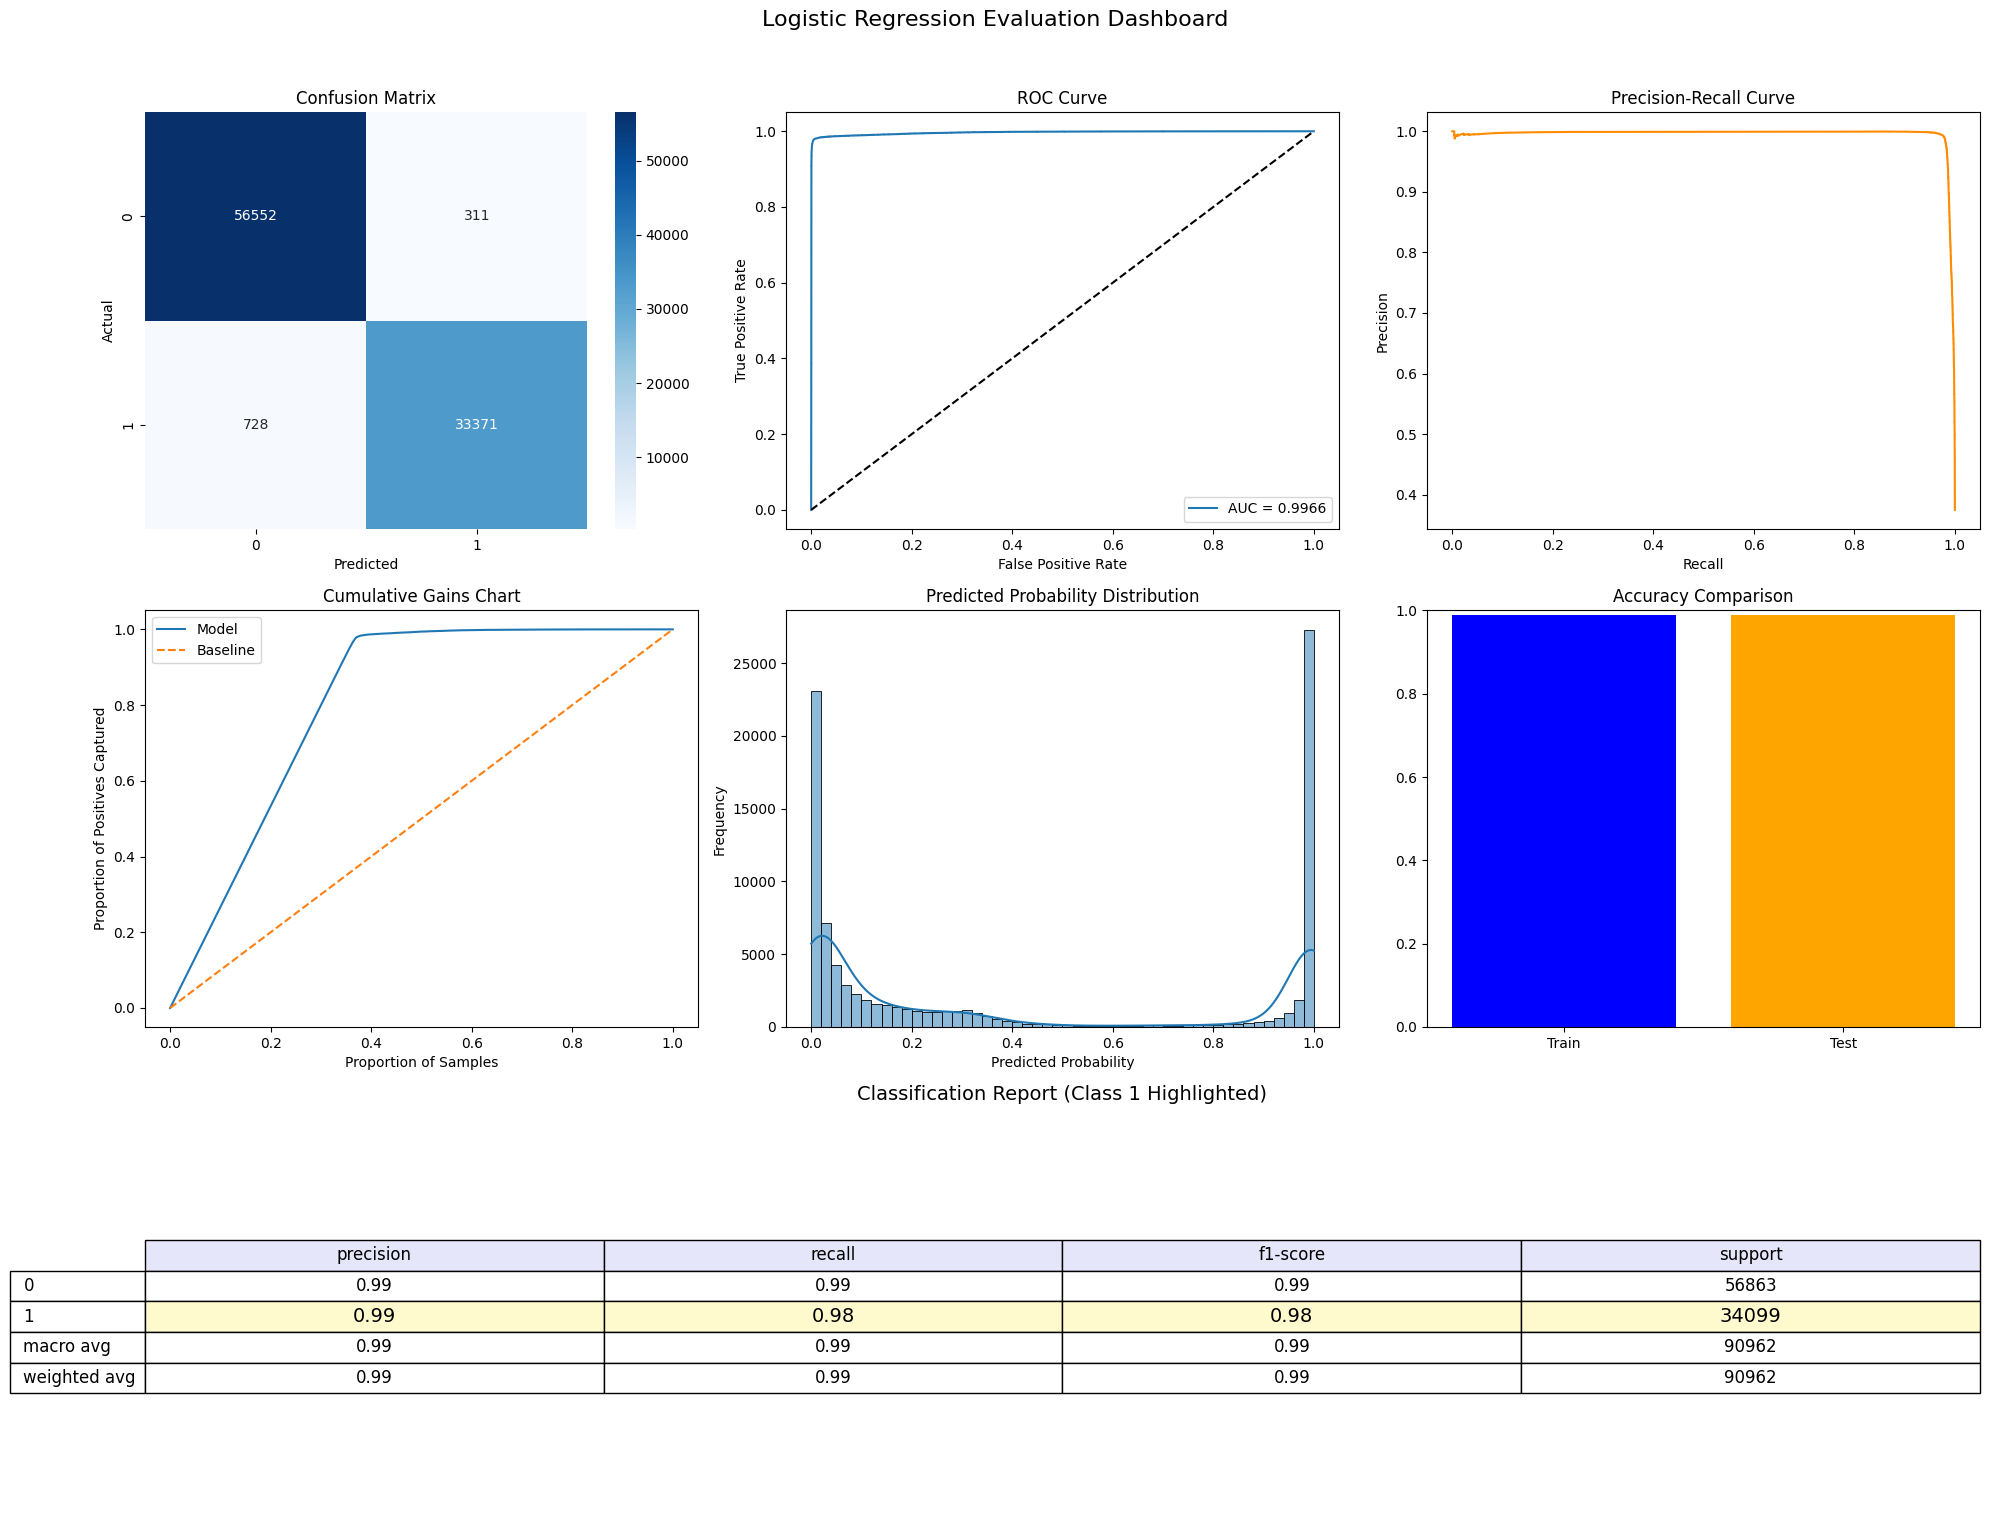


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.98      0.98     34099

    accuracy                           0.99     90962
   macro avg       0.99      0.99      0.99     90962
weighted avg       0.99      0.99      0.99     90962

Logistic Regression ROC AUC Score: 0.9966
Logistic Regression Train Accuracy: 0.9885
Logistic Regression Test Accuracy:  0.9886
No overfitting: Training and test accuracies are close.


In [ ]:
evaluate_model(lr_model, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

### 3.1.2 XGboost

In [ ]:
# Initialize and train the XGBoost model
# Using default parameters, you might want to tune these
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the XGBoost model
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nXGBoost ROC AUC Score:")
print(roc_auc_score(y_test, y_proba_xgb))

# Check for overfitting with XGBoost
y_train_pred_xgb = xgb_model.predict(X_train)

# Calculate training accuracy
train_accuracy_xgb = xgb_model.score(X_train, y_train)
print("\nXGBoost Training Accuracy:", train_accuracy_xgb)

# Calculate testing accuracy
test_accuracy_xgb = xgb_model.score(X_test, y_test)
print("XGBoost Testing Accuracy:", test_accuracy_xgb)

# Compare accuracies
if train_accuracy_xgb > test_accuracy_xgb:
    print("The XGBoost model might be overfitting as training accuracy is higher than testing accuracy.")
elif train_accuracy_xgb < test_accuracy_xgb:
    print("XGBoost Testing accuracy is higher than training accuracy, which is unusual but could happen.")
else:
    print("XGBoost Training and testing accuracies are equal.")


XGBoost Confusion Matrix:
[[56855     8]
 [   14 34085]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     34099

    accuracy                           1.00     90962
   macro avg       1.00      1.00      1.00     90962
weighted avg       1.00      1.00      1.00     90962


XGBoost ROC AUC Score:
0.9999065942919303

XGBoost Training Accuracy: 1.0
XGBoost Testing Accuracy: 0.9997581407620765
The XGBoost model might be overfitting as training accuracy is higher than testing accuracy.


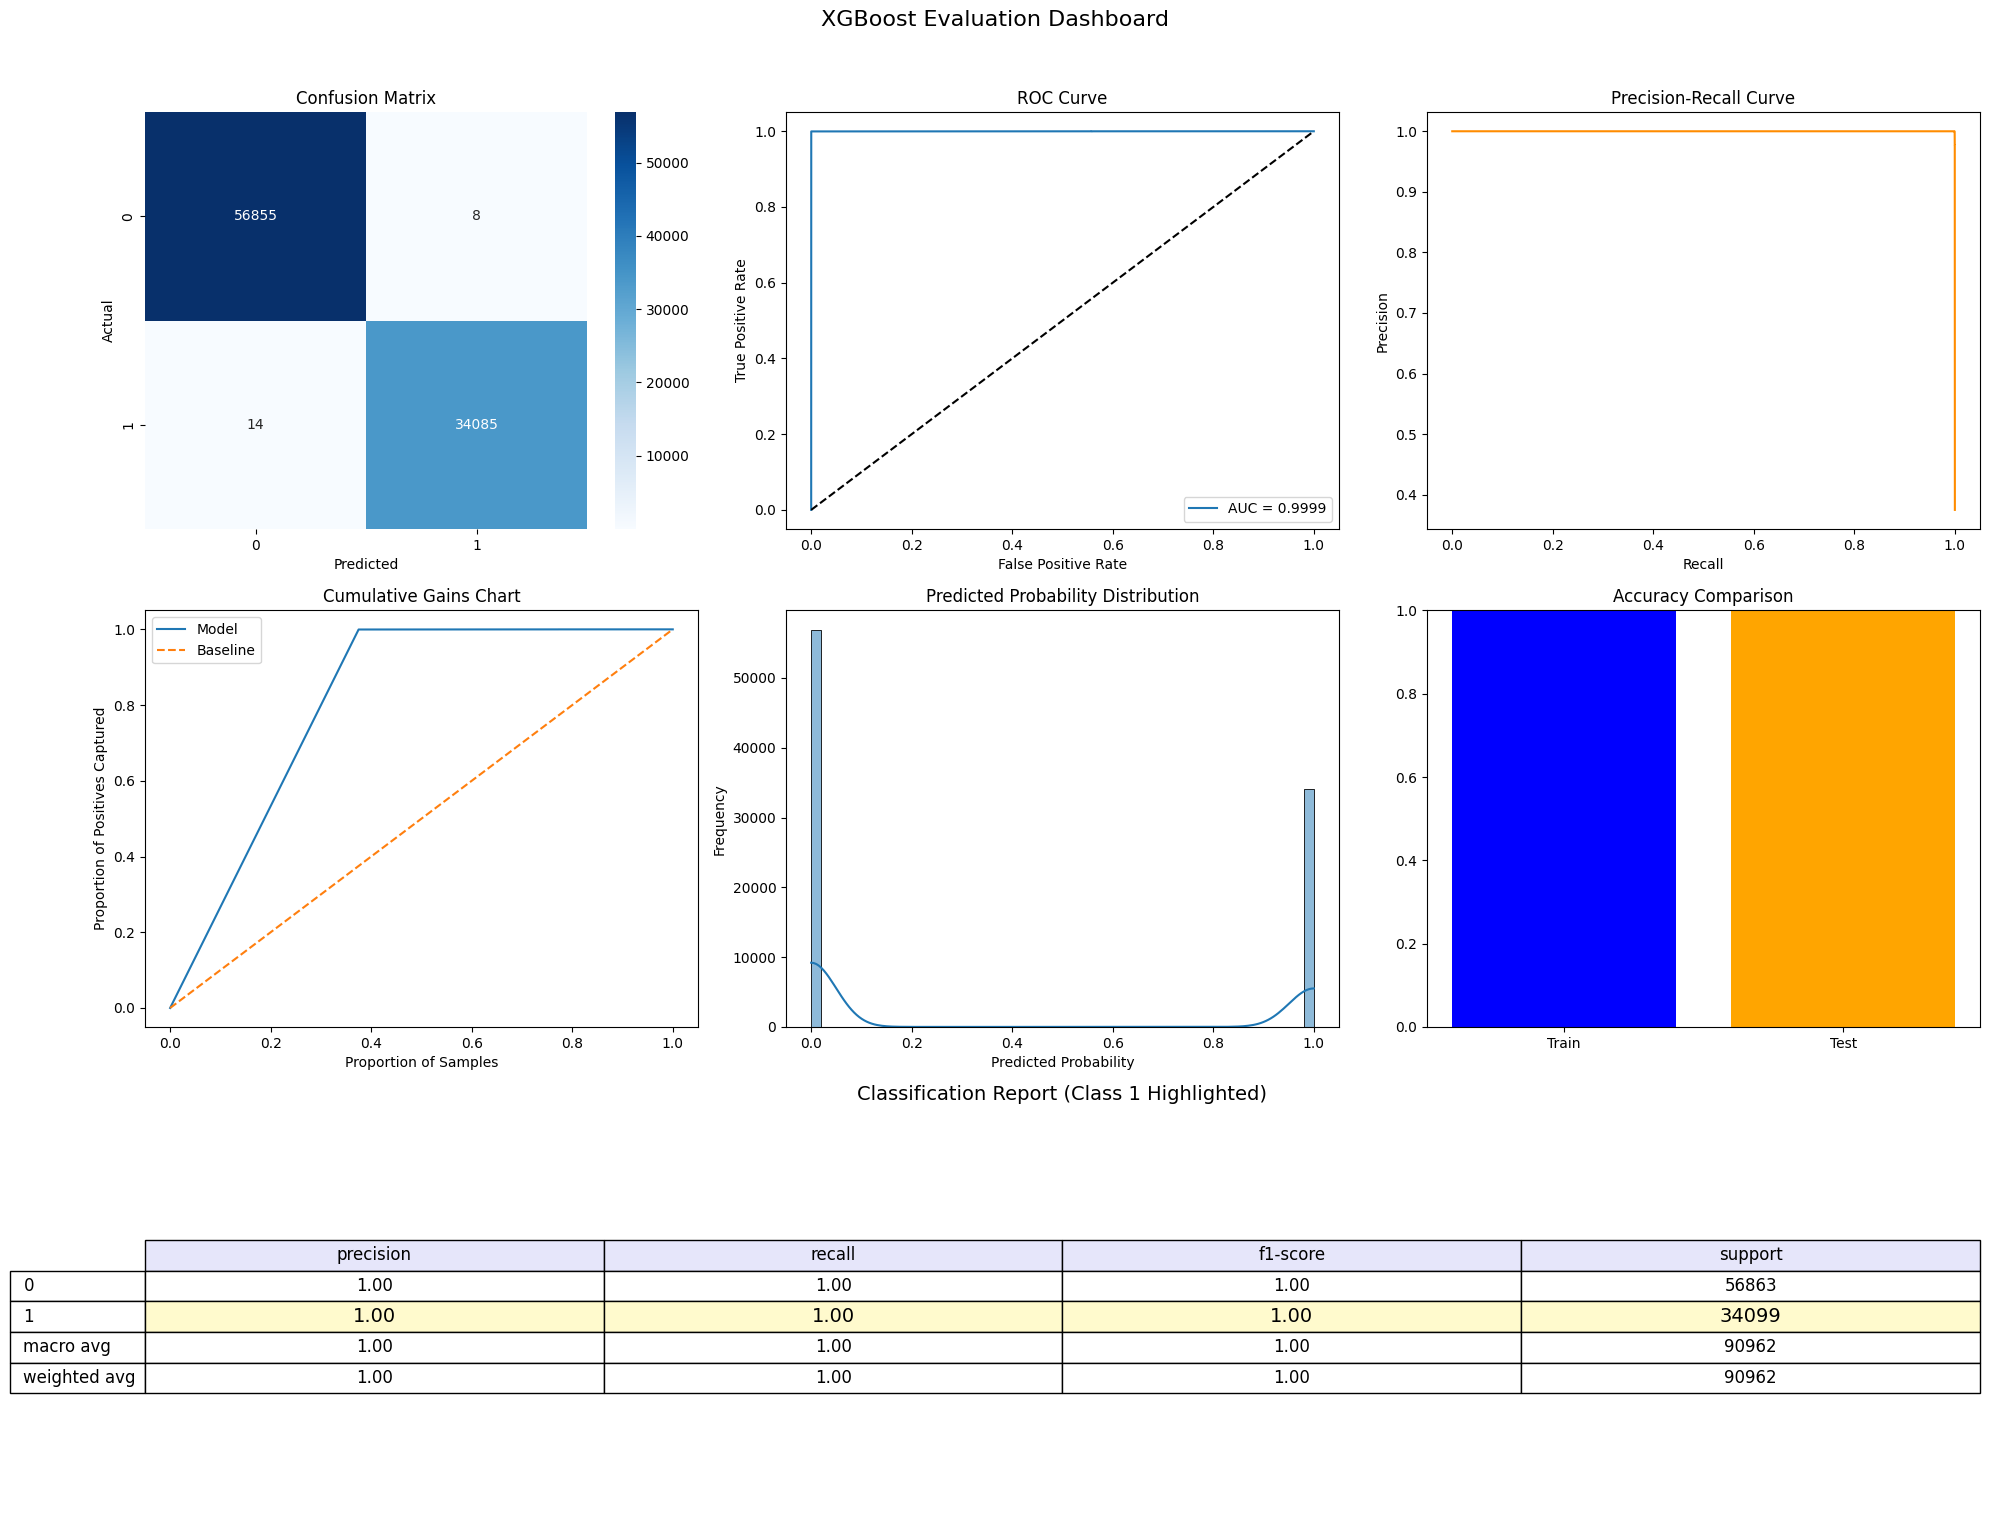


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     34099

    accuracy                           1.00     90962
   macro avg       1.00      1.00      1.00     90962
weighted avg       1.00      1.00      1.00     90962

XGBoost ROC AUC Score: 0.9999
XGBoost Train Accuracy: 1.0000
XGBoost Test Accuracy:  0.9998
No overfitting: Training and test accuracies are close.


In [ ]:
evaluate_model(xgb_model, X_train, y_train, X_test, y_test, model_name="XGBoost")

### 3.1.3 DNN

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model_ann = Sequential([
    Dense(128, activation='elu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model with early stopping
history = model_ann.fit(X_train_scaled, y_train,
                        epochs=100,  # Set a relatively large number of epochs
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)

# Evaluate the model
loss, accuracy = model_ann.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nANN Test Loss: {loss:.4f}")
print(f"ANN Test Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred_ann = (model_ann.predict(X_test_scaled) > 0.5).astype("int32")
y_proba_ann = model_ann.predict(X_test_scaled)

# Evaluate the ANN model
print("\nANN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))
print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_ann))
print("\nANN ROC AUC Score:")
print(roc_auc_score(y_test, y_proba_ann))

# You can also manually calculate training accuracy if desired
train_accuracy_ann = model_ann.evaluate(X_train_scaled, y_train, verbose=0)[1]
print("\nANN Training Accuracy:", train_accuracy_ann)
print("ANN Testing Accuracy:", accuracy)

if train_accuracy_ann > accuracy:
    print("The ANN model might be overfitting as training accuracy is higher than testing accuracy.")
elif train_accuracy_ann < accuracy:
    print("ANN Testing accuracy is higher than training accuracy, which is unusual but could happen.")
else:
    print("ANN Training and testing accuracies are equal.")

Epoch 1/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9985 - loss: 0.0078 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 2/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 3/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 4/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 5/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 6/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 7/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 8/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9996 -

In [ ]:
def evaluate_nn_model(model, X_train, y_train, X_test, y_test, model_name="Neural Network", history=None):
    # Predictions and probabilities
    y_test_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    y_train_pred = (model.predict(X_train) > 0.5).astype("int32").flatten()
    y_test_proba = model.predict(X_test).flatten()
    y_train_proba = model.predict(X_train).flatten()

    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

    # Sort for cumulative gains
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)

    # Create the master figure
    plt.figure(figsize=(20, 16))

    # 1. Confusion Matrix
    plt.subplot(3, 3, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    plt.subplot(3, 3, 2)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    plt.subplot(3, 3, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")

    # 4. Cumulative Gains Chart
    plt.subplot(3, 3, 4)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives")
    plt.title("Cumulative Gains Chart")
    plt.legend()

    # 5. Predicted Probability Distribution
    plt.subplot(3, 3, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title("Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # 6. Accuracy/Loss History (if available)
    if history is not None:
        # Accuracy history
        plt.subplot(3, 3, 6)
        plt.plot(history.history['accuracy'], label='Train')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title('Training Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()

        # Loss history
        plt.subplot(3, 3, 7)
        plt.plot(history.history['loss'], label='Train')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation')
        plt.title('Training Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()

    # 7. Overfitting Check
    plt.subplot(3, 3, 8)
    plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title("Accuracy Comparison")
    plt.ylim(0, 1)

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Evaluation Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # Print numerical results
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")

    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

2843/2843 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
11371/11371 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
11371/11371 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step


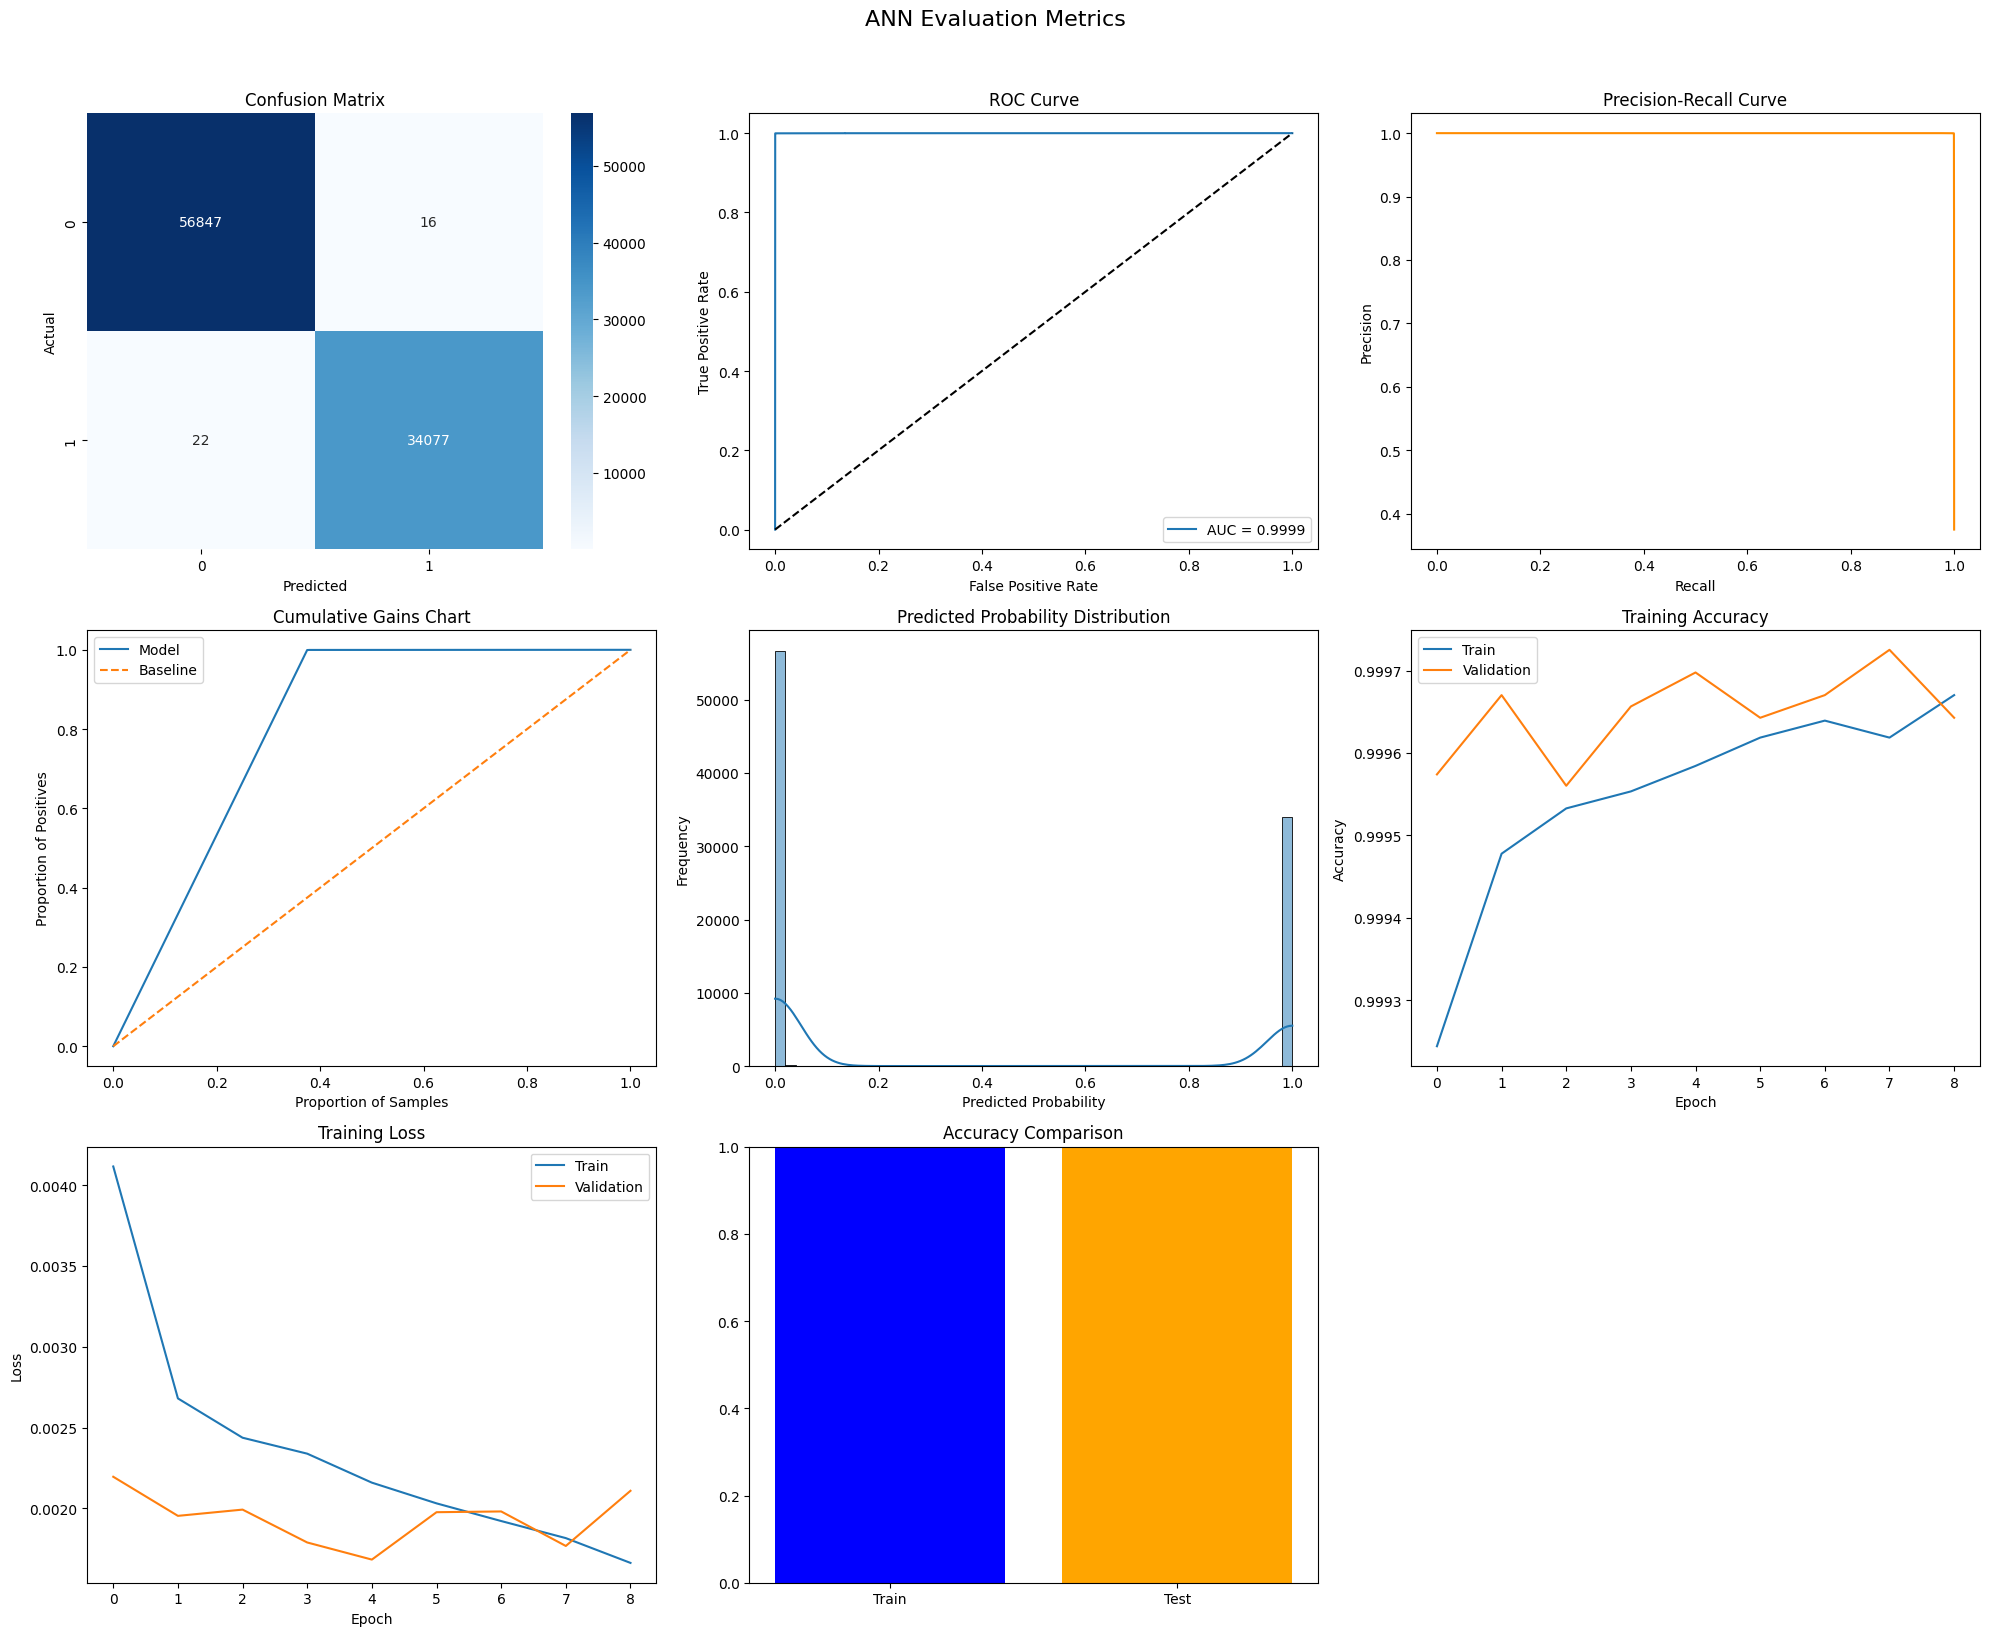


ANN Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     34099

    accuracy                           1.00     90962
   macro avg       1.00      1.00      1.00     90962
weighted avg       1.00      1.00      1.00     90962

ANN ROC AUC Score: 0.9999
Train Accuracy: 0.9997
Test Accuracy:  0.9996
✅ No overfitting: Training and test accuracies are close.


In [ ]:
evaluate_nn_model(model_ann, X_train_scaled, y_train, X_test_scaled, y_test, model_name="ANN", history=history)

## **3.2 Deep Learning**

### 3.2.1 AutoEncoder

In [ ]:
# Filter out the normal transactions for training the autoencoder
X_train_normal = X_train[y_train == 0]

# Scale the normal transactions
scaler_ae = StandardScaler()
X_train_normal_scaled = scaler_ae.fit_transform(X_train_normal)

# Define the Autoencoder model
input_dim = X_train_normal_scaled.shape[1]
encoding_dim = 14  # adjust this based on experimentation

autoencoder = Sequential([
    # Encoder
    Dense(encoding_dim * 2, activation='relu', input_shape=(input_dim,)),
    Dense(encoding_dim, activation='relu'),
    # Decoder
    Dense(encoding_dim * 2, activation='relu'),
    Dense(input_dim, activation='linear')  # Output layer with linear activation for reconstruction
])

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Early stopping callback
early_stopping_ae = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Autoencoder on normal transactions
history_ae = autoencoder.fit(
    X_train_normal_scaled, X_train_normal_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping_ae],
    verbose=1
)

# Scale the entire test set
X_test_scaled_ae = scaler_ae.transform(X_test)

# Define MSE loss with no reduction (element-wise)
mse_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)

# Get reconstruction errors function, handling shape properly
def get_reconstruction_errors(true_data, pred_data):
    errors = mse_fn(true_data, pred_data).numpy()
    if errors.ndim > 1:
        # Average over features dimension (axis=1)
        return errors.mean(axis=1)
    else:
        # Already 1D, just return as is
        return errors

# Calculate reconstruction errors on test set
reconstructions = autoencoder.predict(X_test_scaled_ae)
reconstruction_errors = get_reconstruction_errors(X_test_scaled_ae, reconstructions)

# Calculate reconstruction errors on training normal set (for threshold)
train_reconstructions = autoencoder.predict(X_train_normal_scaled)
train_reconstruction_errors = get_reconstruction_errors(X_train_normal_scaled, train_reconstructions)

# Choose threshold based on percentile of training errors (e.g., 95th percentile)
threshold = np.percentile(train_reconstruction_errors, 95)

print(f"\nAutoencoder Reconstruction Error Threshold: {threshold:.4f}")

# Predict anomalies: 1 if error > threshold, else 0
y_pred_ae = (reconstruction_errors > threshold).astype(int)

# Evaluate performance
print("\nAutoencoder Anomaly Detection Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ae))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ae))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, reconstruction_errors))  # Use raw errors for ROC AUC

Epoch 1/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.5655 - val_loss: 0.2728
Epoch 2/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.2625 - val_loss: 0.2068
Epoch 3/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.2034 - val_loss: 0.1739
Epoch 4/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.1778 - val_loss: 0.1601
Epoch 5/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.1662 - val_loss: 0.1499
Epoch 6/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1572 - val_loss: 0.1432
Epoch 7/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.1507 - val_loss: 0.1380
Epoch 8/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1449 - val_loss: 0.1329
Epoch 9/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1404 - val_loss: 0.1303
Epoch 10/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.1374 - val_loss: 0.1292
Epoch 11/100
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.1353 - val_loss: 0.1268
Epoch 12

In [ ]:
def evaluate_autoencoder(y_true, reconstruction_errors, threshold=None, model_name="Autoencoder",
                       train_reconstruction_errors=None, history=None):
    """
    Evaluate the autoencoder with all plots combined in one image, including training/validation accuracy.

    Parameters:
    - y_true: true labels (0 = normal, 1 = anomaly)
    - reconstruction_errors: array of reconstruction errors
    - threshold: anomaly detection cutoff
    - model_name: string for display
    - train_reconstruction_errors: array of training reconstruction errors
    - history: training history object from model.fit()
    """
    if threshold is None:
        threshold = np.percentile(reconstruction_errors[y_true == 0], 95)
        print(f"Using threshold at 95th percentile of normal data: {threshold:.4f}")

    # Predicted labels from threshold
    y_pred = (reconstruction_errors > threshold).astype(int)

    # Calculate metrics
    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, reconstruction_errors)
    auc = roc_auc_score(y_true, reconstruction_errors)
    precision, recall, _ = precision_recall_curve(y_true, reconstruction_errors)

    # Initialize variables for training metrics
    train_acc = None
    test_acc = accuracy_score(y_true, y_pred)

    # Calculate training accuracy if training errors are provided
    if train_reconstruction_errors is not None:
        train_pred = (train_reconstruction_errors > threshold).astype(int)
        train_labels = np.zeros_like(train_pred)  # All training data is normal
        train_acc = accuracy_score(train_labels, train_pred)
        print(f"\nTraining Accuracy (on normal data): {train_acc:.4f}")

    # Create the master figure
    plt.figure(figsize=(24, 16))

    # 1. Confusion Matrix
    plt.subplot(3, 4, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    plt.subplot(3, 4, 2)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    plt.subplot(3, 4, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")

    # 4. Error Distribution
    plt.subplot(3, 4, 4)
    sns.histplot(reconstruction_errors, bins=50, kde=True)
    plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
    plt.title("Reconstruction Error Distribution")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Frequency")
    plt.legend()

    # 5. Training Loss History (if available)
    if history is not None:
        # Loss history
        plt.subplot(3, 4, 5)
        plt.plot(history.history['loss'], label='Train')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation')
        plt.title('Training Loss')
        plt.ylabel('MSE Loss')
        plt.xlabel('Epoch')
        plt.legend()

        # Accuracy history (if available in history)
        if 'accuracy' in history.history:
            plt.subplot(3, 4, 6)
            plt.plot(history.history['accuracy'], label='Train')
            if 'val_accuracy' in history.history:
                plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title('Training Accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend()
            plt.ylim(0, 1)
        else:
            # Create normalized accuracy from loss if direct accuracy not available
            plt.subplot(3, 4, 6)
            min_loss = min(history.history['loss'])
            max_loss = max(history.history['loss'])
            norm_accuracy = 1 - (np.array(history.history['loss']) - min_loss)/(max_loss - min_loss)
            plt.plot(norm_accuracy, label='Train (norm. from loss)', color='green')

            if 'val_loss' in history.history:
                val_min = min(history.history['val_loss'])
                val_max = max(history.history['val_loss'])
                val_norm = 1 - (np.array(history.history['val_loss']) - val_min)/(val_max - val_min)
                plt.plot(val_norm, label='Validation (norm. from loss)', color='purple')

            plt.title('Normalized Accuracy (from Loss)')
            plt.ylabel('Accuracy-like Metric')
            plt.xlabel('Epoch')
            plt.legend()
            plt.ylim(0, 1)

    # 7. Overfitting Check (if train errors available)
    if train_reconstruction_errors is not None:
        plt.subplot(3, 4, 7)
        plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
        plt.ylim(0, 1)
        plt.title("Accuracy Comparison")
        for i, v in enumerate([train_acc, test_acc]):
            plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Evaluation Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # Print numerical results
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"\n{model_name} ROC AUC Score: {auc:.4f}")

    if train_reconstruction_errors is not None:
        diff = train_acc - test_acc
        print(f"\nOverfitting Check:")
        print(f"Training Accuracy (normal data): {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        if diff > 0.03:
            print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
        elif diff < -0.03:
            print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
        else:
            print("No overfitting: Training and test accuracies are close.")


Training Accuracy (on normal data): 0.9500


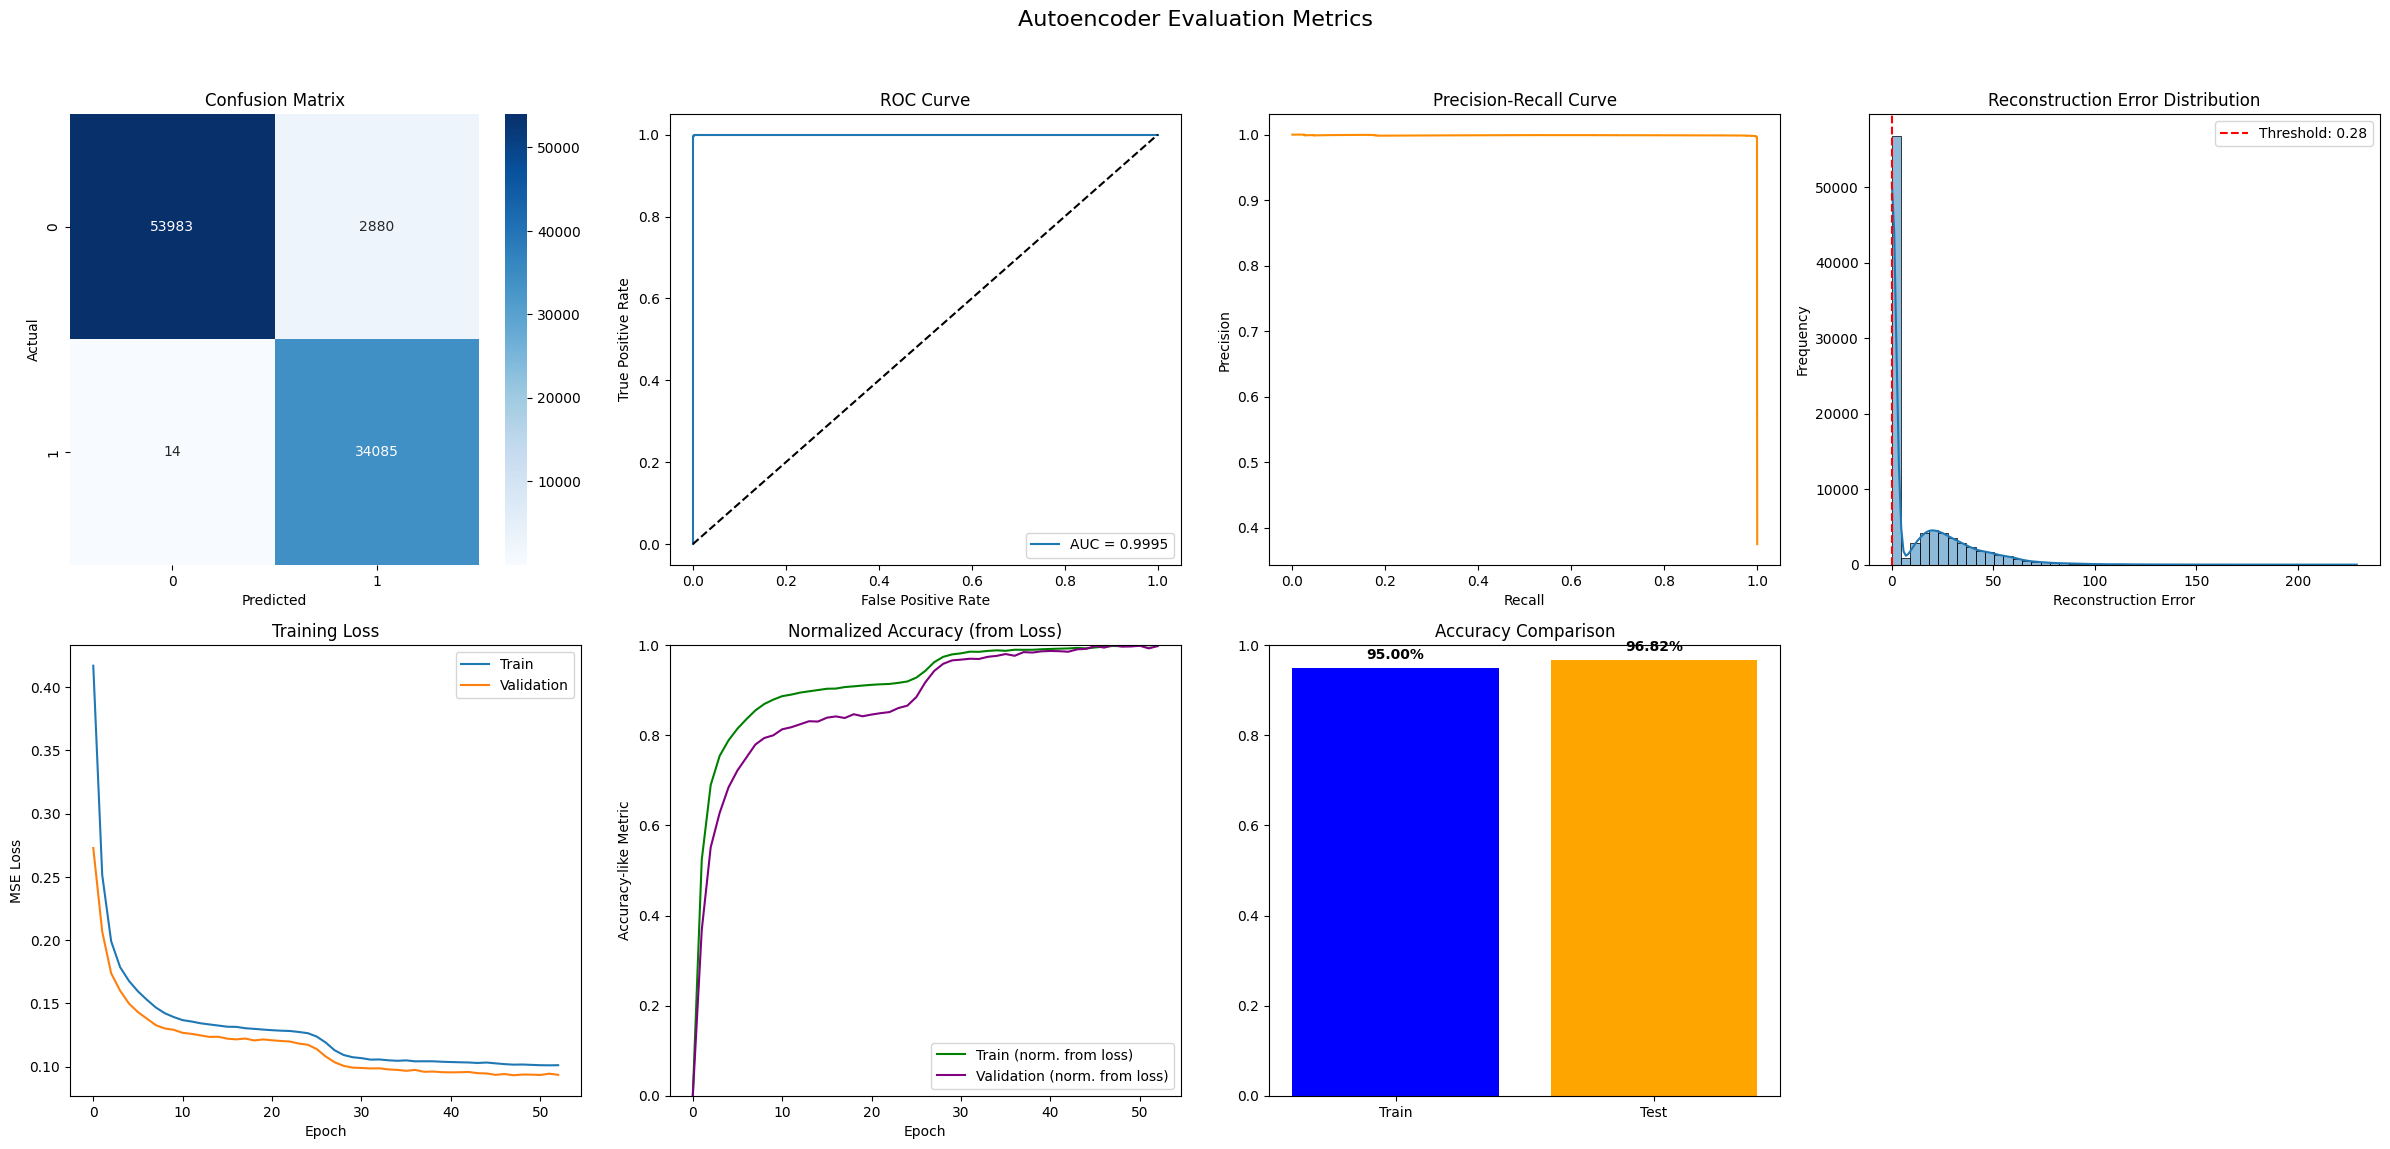


Autoencoder Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56863
           1       0.92      1.00      0.96     34099

    accuracy                           0.97     90962
   macro avg       0.96      0.97      0.97     90962
weighted avg       0.97      0.97      0.97     90962


Autoencoder ROC AUC Score: 0.9995

Overfitting Check:
Training Accuracy (normal data): 0.9500
Test Accuracy: 0.9682
No overfitting: Training and test accuracies are close.


In [ ]:
evaluate_autoencoder(y_test, reconstruction_errors, threshold=threshold, model_name="Autoencoder",
                       train_reconstruction_errors=train_reconstruction_errors, history=history_ae)

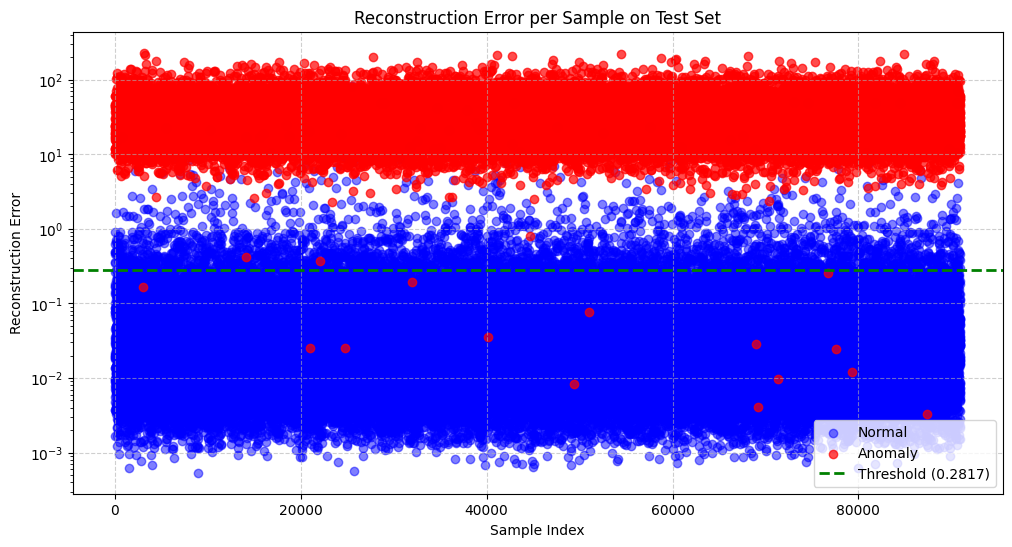

In [ ]:
# Add predicted class to the dataframe for plotting
test_results = pd.DataFrame({
    'Reconstruction_Error': reconstruction_errors,
    'True_Class': y_test.values
})


# Optional: Scatter plot of errors vs. index, colored by class
plt.figure(figsize=(12, 6))
plt.scatter(test_results.index[test_results['True_Class'] == 0], test_results[test_results['True_Class'] == 0]['Reconstruction_Error'], color='blue', alpha=0.5, label='Normal')
plt.scatter(test_results.index[test_results['True_Class'] == 1], test_results[test_results['True_Class'] == 1]['Reconstruction_Error'], color='red', alpha=0.7, label='Anomaly')
plt.axhline(threshold, color='green', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold:.4f})')
plt.title('Reconstruction Error per Sample on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.yscale('log') # Use log scale for better visualization
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 3.2.3 LSTM

In [ ]:
# Define the LSTM model
model_lstm = Sequential([
    # LSTM layer: units, return_sequences (False by default), input_shape (timesteps, features)
    # We use the same reshaped input data as for the SimpleRNN
    LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_lstm = model_lstm.fit(X_train_rnn, y_train,
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              callbacks=[early_stopping_lstm],
                              verbose=1)

# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_rnn, y_test, verbose=0)
print(f"\nLSTM Test Loss: {loss_lstm:.4f}")
print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")

# Predict on the test set
y_pred_lstm = (model_lstm.predict(X_test_rnn) > 0.5).astype("int32")
y_proba_lstm = model_lstm.predict(X_test_rnn)

# Evaluate the LSTM model
print("\nLSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))
print("\nLSTM ROC AUC Score:")
print(roc_auc_score(y_test, y_proba_lstm))

# Check for overfitting with LSTM
# Calculate training accuracy
train_accuracy_lstm = model_lstm.evaluate(X_train_rnn, y_train, verbose=0)[1]
print("\nLSTM Training Accuracy:", train_accuracy_lstm)
print("LSTM Testing Accuracy:", accuracy_lstm)

if train_accuracy_lstm > accuracy_lstm:
    print("The LSTM model might be overfitting as training accuracy is higher than testing accuracy.")
elif train_accuracy_lstm < accuracy_lstm:
    print("LSTM Testing accuracy is higher than training accuracy, which is unusual but could happen.")
else:
    print("LSTM Training and testing accuracies are equal.")


Epoch 1/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 179s 19ms/step - accuracy: 0.9685 - loss: 0.1047 - val_accuracy: 0.9900 - val_loss: 0.0318
Epoch 2/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 198s 19ms/step - accuracy: 0.9905 - loss: 0.0304 - val_accuracy: 0.9933 - val_loss: 0.0208
Epoch 3/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 194s 18ms/step - accuracy: 0.9941 - loss: 0.0190 - val_accuracy: 0.9949 - val_loss: 0.0157
Epoch 4/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 166s 18ms/step - accuracy: 0.9962 - loss: 0.0134 - val_accuracy: 0.9984 - val_loss: 0.0065
Epoch 5/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 161s 18ms/step - accuracy: 0.9982 - loss: 0.0075 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 6/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 170s 19ms/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 7/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 173s 19ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 8/100
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 196s 18ms/step - ac

In [ ]:
def evaluate_lstm_model(model, X_train_scaled, y_train, X_test_scaled, y_test, history=None, model_name="LSTM Model"):
    # Reshape input for LSTM: (samples, timesteps, features)
    X_train = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Predict class labels
    y_test_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    y_train_pred = (model.predict(X_train) > 0.5).astype("int32").flatten()

    # Predicted probabilities
    y_test_proba = model.predict(X_test).flatten()
    y_train_proba = model.predict(X_train).flatten()

    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_test_pred))

    # Create a single comprehensive figure with all evaluation plots
    # Adjust grid size based on whether history is available
    if history is not None:
        plt.figure(figsize=(24, 16))  # Larger figure to accommodate more plots
        subplot_rows, subplot_cols = 3, 4  # 3x4 grid for 8 plots
    else:
        plt.figure(figsize=(18, 12))
        subplot_rows, subplot_cols = 2, 3  # 2x3 grid for 6 plots

    # 1. Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_test_pred)
    plt.subplot(subplot_rows, subplot_cols, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 2)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()

    # 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.subplot(subplot_rows, subplot_cols, 3)
    plt.plot(recall, precision, color='darkorange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")

    # 4. Cumulative Gains Chart
    sorted_idx = np.argsort(-y_test_proba)
    gains_y = np.array(y_test)[sorted_idx]
    cumulative_gains = np.cumsum(gains_y) / np.sum(gains_y)
    percentage_samples = np.arange(1, len(gains_y) + 1) / len(gains_y)
    plt.subplot(subplot_rows, subplot_cols, 4)
    plt.plot(percentage_samples, cumulative_gains, label="Model")
    plt.plot([0, 1], [0, 1], linestyle='--', label="Baseline")
    plt.xlabel("Proportion of Samples")
    plt.ylabel("Proportion of Positives Captured")
    plt.title(f"{model_name} - Cumulative Gains Chart")
    plt.legend()

    # 5. Predicted Probability Distribution
    plt.subplot(subplot_rows, subplot_cols, 5)
    sns.histplot(y_test_proba, bins=50, kde=True)
    plt.title(f"{model_name} - Predicted Probability Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")

    # 6. Overfitting Check
    plt.subplot(subplot_rows, subplot_cols, 6)
    plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.title(f"{model_name} - Overfitting Check")
    plt.ylim(0, 1)
    # Add percentage labels on bars
    plt.text(0, train_acc + 0.02, f"{train_acc:.2%}", ha='center', fontweight='bold')
    plt.text(1, test_acc + 0.02, f"{test_acc:.2%}", ha='center', fontweight='bold')

    # 7 & 8. Training History Plots (if available)
    if history is not None:
        # 7. Accuracy History
        plt.subplot(subplot_rows, subplot_cols, 7)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 8. Loss History
        plt.subplot(subplot_rows, subplot_cols, 8)
        plt.plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} - Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Add super title and adjust layout
    plt.suptitle(f"{model_name} Comprehensive Evaluation", fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"{model_name} ROC AUC Score: {roc_auc:.4f}")
    print(f"{model_name} Train Accuracy: {train_acc:.4f}")
    print(f"{model_name} Test Accuracy:  {test_acc:.4f}")

    # Overfitting analysis
    diff = train_acc - test_acc
    if diff > 0.03:
        print(f"Overfitting detected: Training accuracy is higher by {diff:.2%}")
    elif diff < -0.03:
        print(f"Underfitting or data issue: Test accuracy is higher by {-diff:.2%}")
    else:
        print("No overfitting: Training and test accuracies are close.")

2843/2843 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step
11371/11371 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step
2843/2843 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step
11371/11371 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step

LSTM Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     34099

    accuracy                           1.00     90962
   macro avg       1.00      1.00      1.00     90962
weighted avg       1.00      1.00      1.00     90962



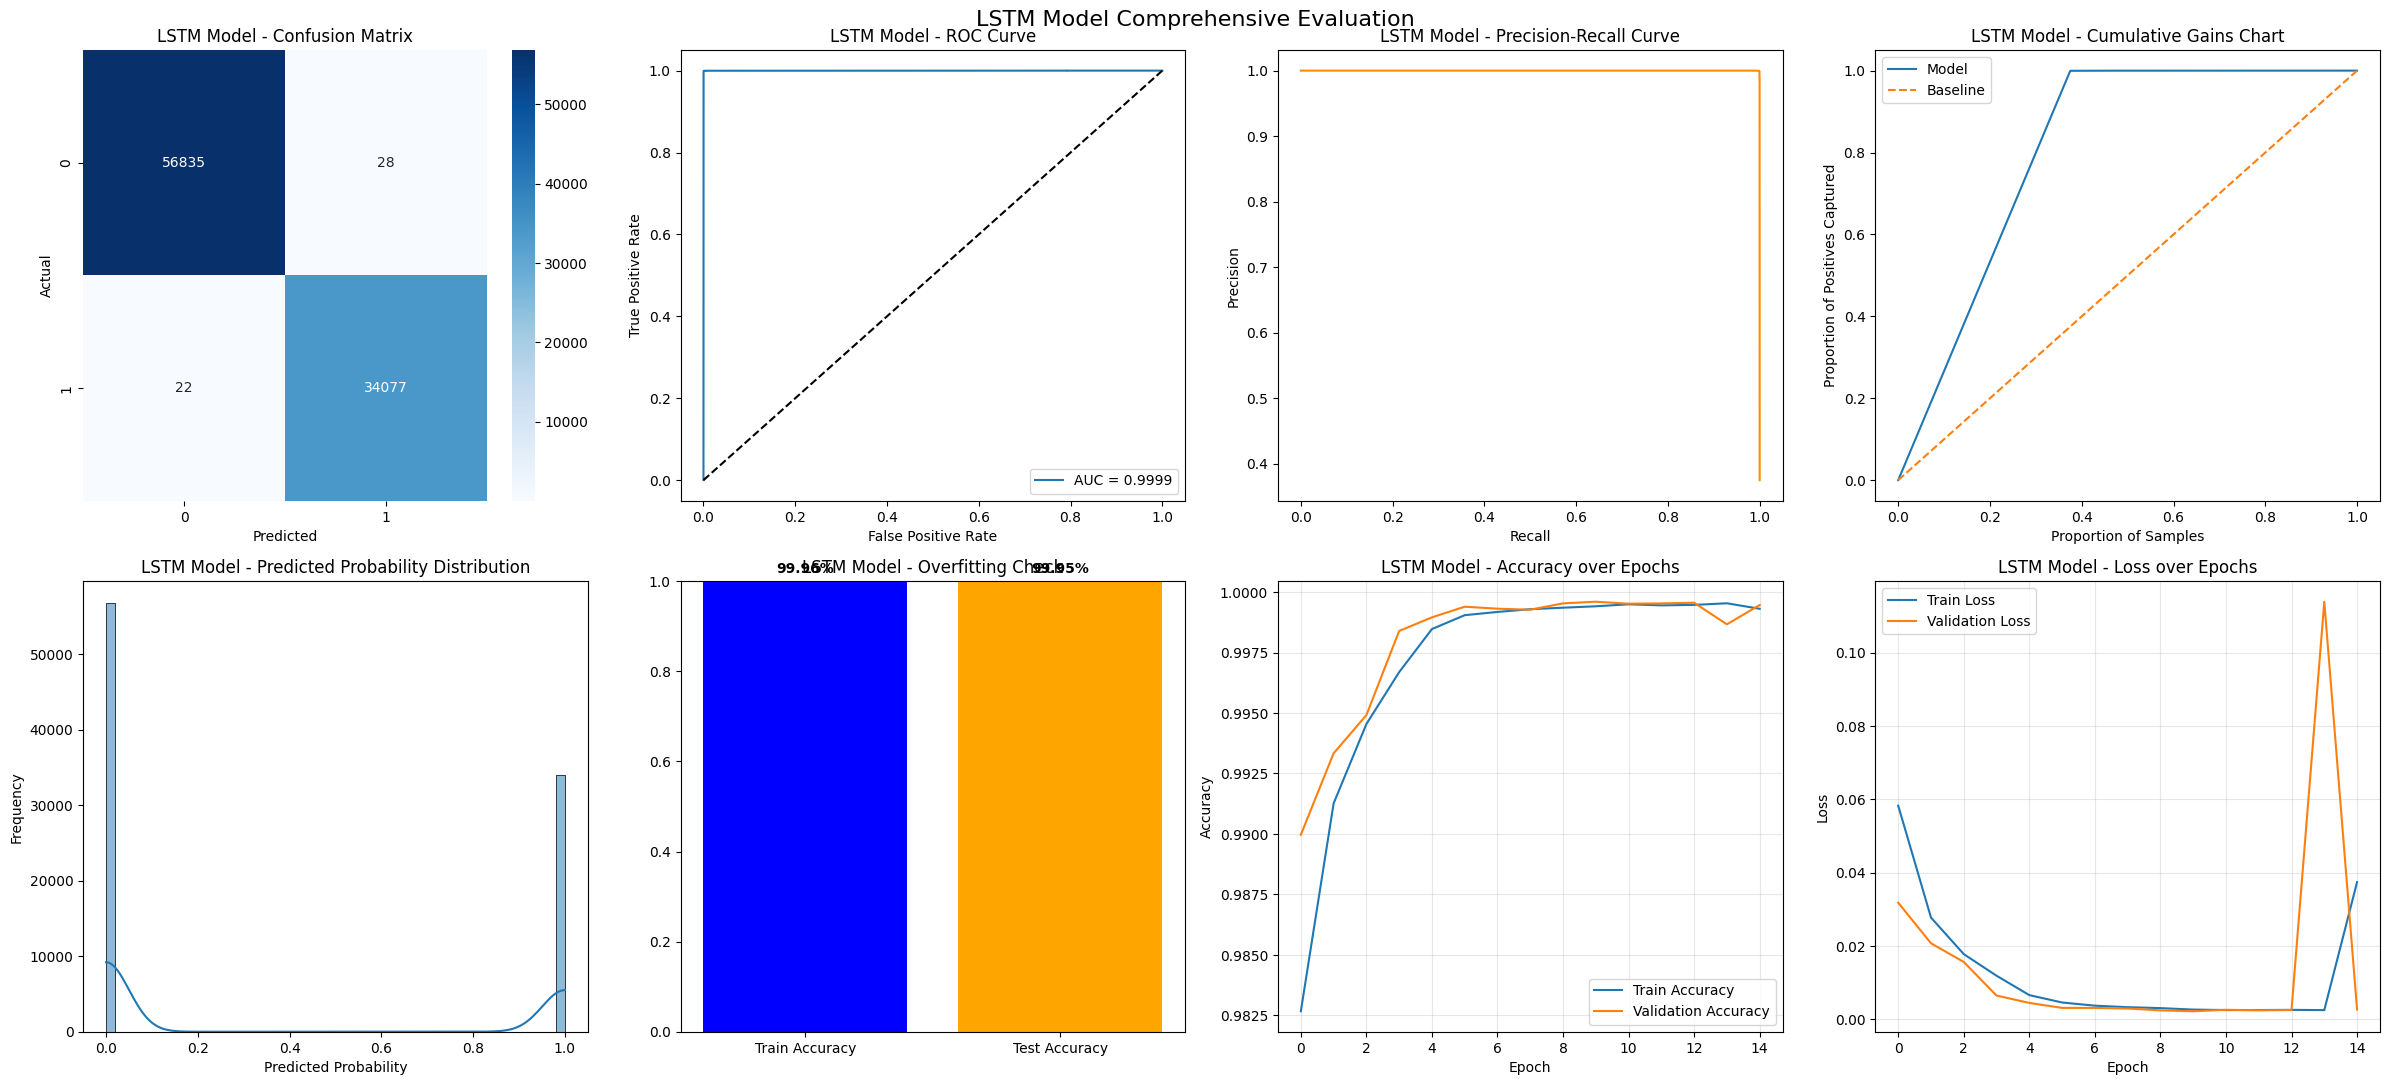

LSTM Model ROC AUC Score: 0.9999
LSTM Model Train Accuracy: 0.9996
LSTM Model Test Accuracy:  0.9995
✅ No overfitting: Training and test accuracies are close.


In [ ]:
evaluate_lstm_model(model_lstm, X_train_scaled, y_train, X_test_scaled, y_test, model_name="LSTM Model", history = history_lstm)

## **3.3 Fraud transformer**

In [ ]:
# === 1. Scaling Phase ===
scaler_tabnet = StandardScaler()
X_train_scaled = scaler_tabnet.fit_transform(X_train)
X_test_scaled = scaler_tabnet.transform(X_test)

# === 2. Create PyTorch Datasets ===
class FraudDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = FraudDataset(X_train_scaled, y_train)
test_dataset = FraudDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# === 3. Define and Train TabNet Model ===
tabnet_model = TabNetClassifier(
    n_d=64, n_a=64,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-3,
    seed=42,
    verbose=0
)

# Train TabNet
tabnet_model.fit(
    X_train=X_train_scaled, y_train=y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric=['auc', 'accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=64,
    virtual_batch_size=128
)

# === 4. Predictions and Evaluation ===
y_pred_tabnet = tabnet_model.predict(X_test_scaled)
y_proba_tabnet = tabnet_model.predict_proba(X_test_scaled)[:, 1]

print("\nTabNet (Fraud Transformer) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tabnet))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tabnet))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba_tabnet))

# Check Overfitting
from sklearn.metrics import accuracy_score

# Predict test set
y_test_pred_tabnet = tabnet_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

# Evaluate test accuracy
test_accuracy_tabnet = accuracy_score(y_test, y_test_pred_tabnet)

print("TabNet Test Accuracy:", test_accuracy_tabnet)


y_train_pred_tabnet = tabnet_model.predict(X_train_scaled)
train_accuracy_tabnet = accuracy_score(y_train, y_train_pred_tabnet)
print("TabNet Train Accuracy:", train_accuracy_tabnet)


print("\nTabNet (Fraud Transformer) Training Accuracy:", train_accuracy_tabnet)
print("TabNet (Fraud Transformer) Testing Accuracy:", test_accuracy_tabnet)



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_accuracy = 0.99952

TabNet (Fraud Transformer) Confusion Matrix:
[[56840    23]
 [   21 34078]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     34099

    accuracy                           1.00     90962
   macro avg       1.00      1.00      1.00     90962
weighted avg       1.00      1.00      1.00     90962


ROC AUC Score:
0.9998543843944205
TabNet Test Accuracy: 0.999516281524153
TabNet Train Accuracy: 0.9995822396899778

TabNet (Fraud Transformer) Training Accuracy: 0.9995822396899778
TabNet (Fraud Transformer) Testing Accuracy: 0.999516281524153


In [ ]:
class FraudDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create PyTorch Datasets
train_dataset = FraudDataset(X_train_scaled, y_train)
test_dataset = FraudDataset(X_test_scaled, y_test)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

from pytorch_tabnet.tab_model import TabNetClassifier

# Define the TabNet model (as a type of transformer for tabular data)
# You might need to tune these hyperparameters
tabnet_model = TabNetClassifier(
    n_d=64, n_a=64, # Dimension of the attention embeddings and the shared embeddings
    n_steps=5, # Number of steps in the architecture
    gamma=1.5, # Parameter affecting the sparsity of the attention masks
    lambda_fn=1e-3, # L1 regularization on the attention masks
    lambda_sparse=1e-3, # Sparsity regularization on the attention masks
    seed=42,
    verbose=0 # Set to 1 for detailed training logs
)

# Train the TabNet model
# Using the scaled data as TabNet internally handles normalization/encoding for continuous features
tabnet_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric=['auc', 'accuracy'],
    max_epochs=100,
    patience=10, # Early stopping patience
    batch_size=64,
    virtual_batch_size=128 # Helps in memory efficiency for large datasets
)

# Predict on the test set
y_pred_tabnet = tabnet_model.predict(X_test_scaled)
y_proba_tabnet = tabnet_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the TabNet model
print("\nTabNet (Fraud Transformer) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tabnet))
print("\nTabNet (Fraud Transformer) Classification Report:")
print(classification_report(y_test, y_pred_tabnet))
print("\nTabNet (Fraud Transformer) ROC AUC Score:")
print(roc_auc_score(y_test, y_proba_tabnet))

# Check for overfitting with TabNet
# TabNet's fit method provides metrics on the training and validation sets
# You can access these from the model's history attribute (if verbose=1) or just evaluate on training data.
y_train_pred_tabnet = tabnet_model.predict(X_train_scaled)
train_accuracy_tabnet = (y_train_pred_tabnet == y_train).mean()

# Get test accuracy from evaluation set
test_accuracy_tabnet = tabnet_model.results['validation_0']['accuracy'][-1] # Assuming 'validation_0' is the eval_set

print("\nTabNet (Fraud Transformer) Training Accuracy:", train_accuracy_tabnet)
print("TabNet (Fraud Transformer) Testing Accuracy:", test_accuracy_tabnet)

if train_accuracy_tabnet > test_accuracy_tabnet:
    print("The TabNet model might be overfitting as training accuracy is higher than testing accuracy.")
elif train_accuracy_tabnet < test_accuracy_tabnet:
    print("TabNet Testing accuracy is higher than training accuracy, which is unusual but could happen.")
else:
    print("TabNet Training and testing accuracies are equal.")


# Add TabNet to the overall comparison
print("\n--- Model Accuracy Comparison ---")

# Logistic Regression
print("\nLogistic Regression:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy:
    print("Potential Overfitting observed in Logistic Regression.")
elif train_accuracy < test_accuracy:
    print("Logistic Regression Test accuracy > Training accuracy.")
else:
    print("Logistic Regression Training and testing accuracies are similar.")

# XGBoost
print("\nXGBoost:")
print(f"Training Accuracy: {train_accuracy_xgb:.4f}")
print(f"Testing Accuracy: {test_accuracy_xgb:.4f}")
if train_accuracy_xgb > test_accuracy_xgb:
    print("Potential Overfitting observed in XGBoost.")
elif train_accuracy_xgb < test_accuracy_xgb:
    print("XGBoost Test accuracy > Training accuracy.")
else:
    print("XGBoost Training and testing accuracies are similar.")

# ANN
print("\nANN:")
print(f"Training Accuracy: {train_accuracy_ann:.4f}")
print(f"Testing Accuracy: {accuracy:.4f}") # 'accuracy' variable holds the test accuracy from evaluate()
if train_accuracy_ann > accuracy:
    print("Potential Overfitting observed in ANN.")
elif train_accuracy_ann < accuracy:
    print("ANN Test accuracy > Training accuracy.")
else:
    print("ANN Training and testing accuracies are similar.")

# Autoencoder (Using the calculated classification accuracy based on the threshold)
print("\nAutoencoder (Anomaly Detection):")
# Re-calculate accuracy based on AE threshold predictions for consistency
accuracy_ae_threshold = (y_pred_ae == y_test).mean()
print(f"Classification Accuracy on Test Set: {accuracy_ae_threshold:.4f}")
# Note: Autoencoder evaluation is typically based on reconstruction error, not standard classification accuracy
# The accuracy printed here is based on the chosen threshold for classifying samples.
# train/test overfitting check is based on reconstruction error means printed earlier.


# RNN
print("\nSimple RNN:")
print(f"Training Accuracy: {train_accuracy_rnn:.4f}")
print(f"Testing Accuracy: {accuracy_rnn:.4f}")
if train_accuracy_rnn > accuracy_rnn:
    print("Potential Overfitting observed in Simple RNN.")
elif train_accuracy_rnn < accuracy_rnn:
    print("Simple RNN Test accuracy > Training accuracy.")
else:
    print("Simple RNN Training and testing accuracies are similar.")


# LSTM
print("\nLSTM:")
print(f"Training Accuracy: {train_accuracy_lstm:.4f}")
print(f"Testing Accuracy: {accuracy_lstm:.4f}")
if train_accuracy_lstm > accuracy_lstm:
    print("Potential Overfitting observed in LSTM.")
elif train_accuracy_lstm < accuracy_lstm:
    print("LSTM Testing accuracy is higher than training accuracy, which is unusual but could happen.")
else:
    print("LSTM Training and testing accuracies are similar.")

# TabNet (Fraud Transformer)
print("\nTabNet (Fraud Transformer):")
print(f"Training Accuracy: {train_accuracy_tabnet:.4f}")
print(f"Testing Accuracy: {test_accuracy_tabnet:.4f}")
if train_accuracy_tabnet > test_accuracy_tabnet:
    print("Potential Overfitting observed in TabNet.")
elif train_accuracy_tabnet < test_accuracy_tabnet:
    print("TabNet Test accuracy > Training accuracy.")
else:
    print("TabNet Training and testing accuracies are similar.")


# **4. Final Comparison**

In [ ]:

# Function to get classification report metrics
def get_classification_metrics(y_true, y_pred):
  report = classification_report(y_true, y_pred, output_dict=True)
  # Get metrics for the positive class (assuming '1' is the positive class)
  # Handle cases where report might not have metrics for class '1' if no positive predictions
  if '1' in report:
      return {
          'Precision': report['1']['precision'],
          'Recall': report['1']['recall'],
          'F1-Score': report['1']['f1-score'],
          'Accuracy': report['accuracy']
      }
  else:
      # If no positive predictions, Precision, Recall, F1-Score for class 1 are 0 or undefined
      return {
          'Precision': 0.0,
          'Recall': 0.0,
          'F1-Score': 0.0,
          'Accuracy': report['accuracy']
      }

# Store metrics in a dictionary
model_metrics = {}

# Get metrics for Logistic Regression
metrics_lr = get_classification_metrics(y_test, y_pred)
model_metrics['Logistic Regression'] = metrics_lr

# Get metrics for XGBoost
metrics_xgb = get_classification_metrics(y_test, y_pred_xgb)
model_metrics['XGBoost'] = metrics_xgb

# Get metrics for ANN
metrics_ann = get_classification_metrics(y_test, y_pred_ann)
model_metrics['DNN'] = metrics_ann

# Get metrics for Autoencoder (using the prediction based on threshold)
metrics_ae = get_classification_metrics(y_test, y_pred_ae)
model_metrics['Autoencoder'] = metrics_ae

# Get metrics for Simple RNN
metrics_rnn = get_classification_metrics(y_test, y_pred_rnn)
model_metrics['RNN'] = metrics_rnn

# Get metrics for LSTM
metrics_lstm = get_classification_metrics(y_test, y_pred_lstm)
model_metrics['LSTM'] = metrics_lstm

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

# Display the table
print("\n--- Model Comparison Table ---")
print(metrics_df.to_markdown(floatfmt=".4f"))




--- Model Comparison Table ---
|                     |   Precision |   Recall |   F1-Score |   Accuracy |
|:--------------------|------------:|---------:|-----------:|-----------:|
| Logistic Regression |      0.9908 |   0.9787 |     0.9847 |     0.9886 |
| XGBoost             |      0.9998 |   0.9996 |     0.9997 |     0.9998 |
| DNN                 |      0.9995 |   0.9994 |     0.9994 |     0.9996 |
| Autoencoder         |      0.9221 |   0.9996 |     0.9593 |     0.9682 |
| RNN                 |      0.9991 |   0.9987 |     0.9989 |     0.9992 |
| LSTM                |      0.9992 |   0.9994 |     0.9993 |     0.9995 |
